<a href="https://colab.research.google.com/github/samuelmat/DSPS_sMatylewicz/blob/master/HW6/Lab_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import scipy as sp
from scipy import optimize
import numpy as np
from matplotlib import pylab as pl

In [0]:
np.random.seed(555)

In [0]:
x_vals = np.random.rand(100) * 10

In [37]:
x_vals

array([7.17834087, 0.47855133, 9.44471978, 6.8638004 , 5.81207334,
       1.42678616, 9.45919181, 3.39990587, 6.20435458, 4.52959644,
       2.3976742 , 0.34504591, 1.48593113, 8.10866174, 6.53105376,
       5.44468685, 0.41194765, 4.68166251, 8.88746733, 4.76258557,
       4.12488984, 6.16106538, 3.21416554, 5.80869263, 3.9661405 ,
       0.20091368, 4.31395898, 4.11244512, 6.29061747, 5.02521894,
       1.6212784 , 6.66897061, 1.35272291, 1.69937536, 2.20830313,
       0.86670475, 0.46840069, 0.28908051, 4.3867962 , 8.08565064,
       6.13362455, 6.6097222 , 9.28622121, 4.87345755, 6.38178521,
       1.85093821, 2.50653771, 4.46628009, 9.72624065, 4.67703036,
       4.07470269, 7.86091879, 3.71535104, 2.20143415, 3.07846727,
       2.86184245, 1.47343012, 7.42969034, 7.94321078, 3.2902046 ,
       0.62102981, 9.66696377, 0.34688228, 7.92288645, 0.2252943 ,
       1.59693565, 1.46141363, 8.8278803 , 1.89545066, 3.34775168,
       4.09820686, 0.57803204, 5.42383827, 8.46712172, 8.24706

In [0]:
def line(x, a, b):
  """
  Takes two parameters (a and b) along with an array of x values. Return y array
  """
  
  return a * x + b

In [0]:
y_vals = line(x_vals, 4, 3)

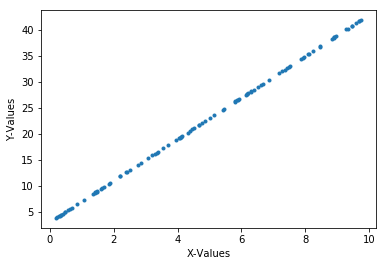

In [40]:
pl.plot(x_vals, y_vals, ".")
pl.xlabel("X-Values")
pl.ylabel("Y-Values");

In [0]:
scattered_y = np.random.randn(100) * 5

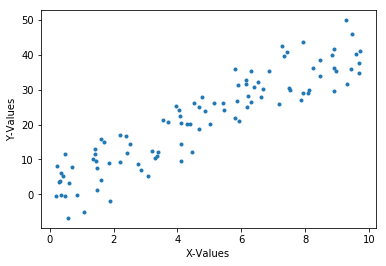

In [42]:
y_vals += scattered_y

pl.plot(x_vals, y_vals, ".")
pl.xlabel("X-Values")
pl.ylabel("Y-Values");

In [0]:
uncertainties = np.random.randn(100) * 7

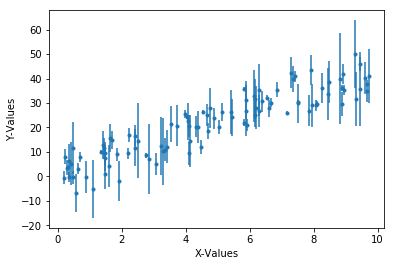

In [44]:
pl.errorbar(x_vals, y_vals, yerr = uncertainties, fmt = ".")
pl.xlabel("X-Values")
pl.ylabel("Y-Values");

In [0]:
popt, pcov = sp.optimize.curve_fit(line, x_vals, y_vals, p0 = [5, 0])

In [47]:
pcov

array([[ 0.03279955, -0.15642658],
       [-0.15642658,  1.02770122]])

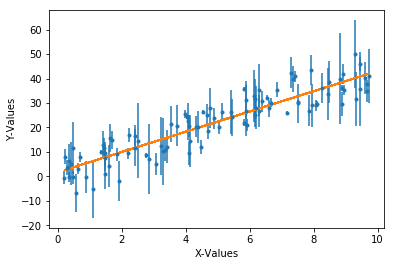

In [49]:
pl.errorbar(x_vals, y_vals, yerr = uncertainties, fmt = ".")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), "-")
pl.xlabel("X-Values")
pl.ylabel("Y-Values")

pl.fill_between(x_vals, line(x_vals, popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5), 
                line(x_vals, popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5), alpha = 0.5)

In [0]:
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
regr = skl.linear_model.LinearRegression()
regr.fit(np.atleast_2d(x_vals).T, y_vals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

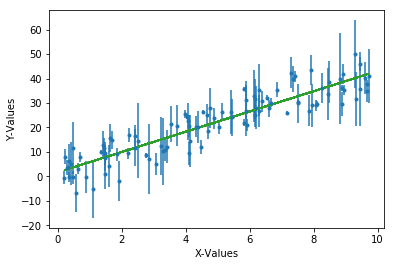

In [52]:
pl.errorbar(x_vals, y_vals, yerr = uncertainties, fmt = ".")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), "-")
pl.xlabel("X-Values")
pl.ylabel("Y-Values")

pl.plot(x_vals, regr.predict(np.atleast_2d(x_vals).T))

In [53]:
regr.score(np.atleast_2d(x_vals).T, y_vals)

0.8416082125726227

In [57]:
regr.fit(np.atleast_2d(x_vals[75:]).T, y_vals[75:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
regr.score(np.atleast_2d(x_vals[75:]).T, y_vals[75:])

0.8210434102157635